In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from keras import layers

from keras.datasets import cifar10
import keras
from keras import layers
from PIL import Image, ImageFilter
from keras.datasets import mnist
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Activation, LeakyReLU, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
import numpy as np
import cv2

2024-07-11 17:02:19.525464: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-11 17:02:19.547849: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-11 17:02:19.854584: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
IMAGE_SIZE = 256

def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    #array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), IMAGE_SIZE, IMAGE_SIZE, 3))
    return array

def one_depreprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") * 255.0
    array = np.reshape(array, (IMAGE_SIZE, IMAGE_SIZE, 3))
    return array

def depreprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    #array = array.astype("float32") * 255.0
    array = np.reshape(array, (len(array), IMAGE_SIZE, IMAGE_SIZE, 3))
    return array

In [3]:
train_data_path = '/home/takanolab/proglams_python/data' # ここを変更。Colaboratoryにアップロードしたzipファイルを解凍後の、データセットのフォルダ名を入力

image_size = IMAGE_SIZE # ここを変更。必要に応じて変更してください。「28」を指定した場合、縦28横28ピクセルの画像に変換します。

color_setting = 3  #ここを変更。データセット画像のカラー：「1」はモノクロ・グレースケール。「3」はカラー。

folder = ['hatake','kawa','mori','tatemono'] # ここを変更。データセット画像のフォルダ名（クラス名）を半角英数で入力

class_number = len(folder)
print('Number of class : ', str(class_number))

Number of class :  4


In [5]:
X_image = []  
Y_label = []
for index, name in enumerate(folder):
  read_data = train_data_path + '/' + name
  files = glob.glob(read_data + '/*.png') #ここを変更。png形式のファイルを利用する場合のサンプルです。
  print('--- 読み込んだデータセットは', read_data, 'です。')
  num=0
  for i, file in enumerate(files):
    if color_setting == 1:
      img = load_img(file, color_mode = 'grayscale' ,target_size=(image_size, image_size))  
    elif color_setting == 3:
      img = load_img(file, color_mode = 'rgb' ,target_size=(image_size, image_size))
    array = img_to_array(img)
    X_image.append(array)
    num +=1
    Y_label.append(index)
  print('index: ',index,' num:',num)

X_image = np.array(X_image)
Y_label = np.array(Y_label)

--- 読み込んだデータセットは /home/takanolab/proglams_python/data/hatake です。
index:  0  num: 144
--- 読み込んだデータセットは /home/takanolab/proglams_python/data/kawa です。
index:  1  num: 144
--- 読み込んだデータセットは /home/takanolab/proglams_python/data/mori です。
index:  2  num: 144
--- 読み込んだデータセットは /home/takanolab/proglams_python/data/tatemono です。
index:  3  num: 144


In [20]:
train_images, valid_images ,train_labels ,valid_labels = train_test_split(X_image,Y_label,test_size=0.20,shuffle = True)
x_train = train_images
y_train = train_labels
x_test = valid_images
y_test = valid_labels

Z_DIM=100

In [21]:
def r_loss(y_true, y_pred):
  return K.mean(K.square(K.log(y_true + 1) - K.log(y_pred + 1)), axis=-1)

Encoder_model = keras.models.load_model("/home/takanolab/davbi/development/Public-2021065/ex1/newmodel/ex1_model1/", custom_objects={"r_loss": r_loss })
Encoder_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 256, 256, 3)]     0         
                                                                 
 encoder_conv_0 (Conv2D)     (None, 256, 256, 3)       84        
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 3)       0         
                                                                 
 encoder_conv_1 (Conv2D)     (None, 128, 128, 16)      448       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128, 128, 16)      0         
                                                                 
 encoder_conv_2 (Conv2D)     (None, 64, 64, 32)        4640      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64, 64, 32)        0   

In [22]:
layer_name = 'encoder_output'
intermediate_layer_model = Model(inputs=Encoder_model.input,
                                 outputs=Encoder_model.get_layer(layer_name).output)

In [23]:
intermediate_layer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 256, 256, 3)]     0         
                                                                 
 encoder_conv_0 (Conv2D)     (None, 256, 256, 3)       84        
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 3)       0         
                                                                 
 encoder_conv_1 (Conv2D)     (None, 128, 128, 16)      448       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128, 128, 16)      0         
                                                                 
 encoder_conv_2 (Conv2D)     (None, 64, 64, 32)        4640      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64, 64, 32)        0   

In [118]:
import io
from contextlib import redirect_stdout

# Define the function to get the model summary as a string
def get_model_summary(model):
    stream = io.StringIO()
    with redirect_stdout(stream):
        model.summary()
    summary_str = stream.getvalue()
    return summary_str

# Assume model2 is your Keras model
# Get the model summary as a string
summary_str = get_model_summary(intermediate_layer_model)

# Define the file path to save the summary
file_path = 'summary.txt'

# Write the model summary string to a text file
with open(file_path, 'w') as f:
    f.write(summary_str)

print(f"Model summary saved to {file_path}")

Model summary saved to summary.txt


In [24]:
x_train2 = intermediate_layer_model.predict(x_train)
print(x_train2.shape)
x_test2 = intermediate_layer_model.predict(x_test)
print(x_test2.shape)

15/15 [==============================] - 0s 4ms/step
(460, 100)
4/4 [==============================] - 0s 4ms/step
(116, 100)


In [25]:
class_idx_to_train_idxs = defaultdict(list)
for y_train_idx, y in enumerate(y_train):
    #print(y_train)
    #print(y_train.shape)
    class_idx_to_train_idxs[y].append(y_train_idx)

class_idx_to_test_idxs = defaultdict(list)
for y_test_idx, y in enumerate(y_test):
    class_idx_to_test_idxs[y].append(y_test_idx)

In [95]:
num_classes = 4

class AnchorPositivePairs(keras.utils.Sequence):
    def __init__(self, num_batchs,save_path=None):
        self.num_batchs = num_batchs
        self.save_path = save_path
        self.all_pairs = []

    def __len__(self):
        return self.num_batchs

    def __getitem__(self, _idx):
        #x = np.empty((2, num_classes, 64,64,50), dtype=np.float32)
        x = np.empty((2, num_classes, Z_DIM), dtype=np.float32)
        batch_pairs=[]
        for class_idx in range(num_classes):
            examples_for_class = class_idx_to_train_idxs[class_idx]
            anchor_idx = random.choice(examples_for_class)
            positive_idx = random.choice(examples_for_class)
            while positive_idx == anchor_idx:
                positive_idx = random.choice(examples_for_class)
            x[0, class_idx] = x_train2[anchor_idx]
            x[1, class_idx] = x_train2[positive_idx]
            self.all_pairs.append((x_train2[anchor_idx], x_train2[positive_idx]))
        return x
    
    def save_pairs(self):
        if self.save_path:
            np.savez(self.save_path, pairs=self.all_pairs)
            print(f"Anchor-positive pairs saved to {self.save_path}")

In [96]:
class EmbeddingModel(keras.Model):
    #train_step(self, data) メソッドだけをオーバーライドします。
    def train_step(self, data):
        # Note: Workaround for open issue, to be removed.未解決の問題の回避策。削除される予定です。
        if isinstance(data, tuple):
            data = data[0]
        anchors, positives = data[0], data[1]

        with tf.GradientTape() as tape:
            # Run both anchors and positives through model.
            # モデルを通してアンカーとポジティブの両方を実行します。
            anchor_embeddings = self(anchors, training=True)
            positive_embeddings = self(positives, training=True)

            # Calculate cosine similarity between anchors and positives. As they have
            # been normalised this is just the pair wise dot products.
            # アンカーとポジティブの間のコサイン類似度を計算します。彼らがそうしているように
            # 正規化されているため、これは単なるペアごとの内積です。
            #　ランダムに選択されたものとその対応する同ラベルとの内積
            similarities = tf.einsum(
                "ae,pe->ap", anchor_embeddings, positive_embeddings
            )

            # Since we intend to use these as logits we scale them by a temperature.
            # This value would normally be chosen as a hyper parameter.
            # これらをロジットとして使用するつもりなので、温度によってスケールします。
            # この値は通常、ハイパーパラメータとして選択されます。
            temperature = 0.2
            similarities /= temperature

            # We use these similarities as logits for a softmax. The labels for
            # this call are just the sequence [0, 1, 2, ..., num_classes] since we
            # want the main diagonal values, which correspond to the anchor/positive
            # pairs, to be high. This loss will move embeddings for the
            # anchor/positive pairs together and move all other pairs apart.
            # これらの類似性をソフトマックスのロジットとして使用します。のラベル
            # この呼び出しはシーケンス [0, 1, 2, ..., num_classes] です。
            # アンカー/ポジティブに対応する主な対角値が必要です
            # ペア、高くなります。この損失により、エンベディングが移動します。
            # アンカー/ポジティブペアを一緒に固定し、他のすべてのペアを離します。
            sparse_labels = tf.range(num_classes)
            loss = self.compiled_loss(sparse_labels, similarities)

        # Calculate gradients and apply via optimizer.
        #勾配を計算し、オプティマイザーを介して適用します。
        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        # Update and return metrics (specifically the one for the loss value).
        #メトリクス (特に損失値のメトリクス) を更新して返します。
        self.compiled_metrics.update_state(sparse_labels, similarities)
        return {m.name: m.result() for m in self.metrics}

In [97]:
inputs2 = layers.Input(shape=(Z_DIM))
x2 = layers.Dense(units=1000, activation='relu')(inputs2)
x2 = layers.Dense(units=2000, activation=None)(x2)
embeddings = layers.Dense(units=1000, activation=None)(x2)
embeddings = tf.nn.l2_normalize(embeddings, axis=-1)

model2 = EmbeddingModel(inputs2, embeddings)


model2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=2e-3),
    #one-hot 表現でラベルが作成されている場合は CategoricalCrossentropy を利用する
    #整数でラベルが作成されている場合は、SparseCategoricalCrossentropy を利用する
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
)

In [98]:
model2.summary()

Model: "embedding_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_21 (Dense)            (None, 1000)              101000    
                                                                 
 dense_22 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_23 (Dense)            (None, 1000)              2001000   
                                                                 
 tf.math.l2_normalize_7 (TFO  (None, 1000)             0         
 pLambda)                                                        
                                                                 
Total params: 4,104,000
Trainable params: 4,104,000
Non-trainable params: 0
_______________________________________

In [99]:
data_generator = AnchorPositivePairs(num_batchs=64, save_path="/home/takanolab/davbi/development/devedge/pairs")
history = model2.fit(data_generator, epochs=100)
data_generator.save_pairs()

Epoch 1/100


2024-07-11 18:25:17.541729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


64/64 [==============================] - 0s 976us/step - loss: 1.3704
Epoch 2/100
64/64 [==============================] - 0s 1ms/step - loss: 1.3353
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 1.3197
Epoch 4/100
64/64 [==============================] - 0s 1ms/step - loss: 1.2637
Epoch 5/100
64/64 [==============================] - 0s 2ms/step - loss: 1.2001
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 1.1620
Epoch 7/100
64/64 [==============================] - 0s 3ms/step - loss: 1.1421
Epoch 8/100
64/64 [==============================] - 0s 3ms/step - loss: 0.9774
Epoch 9/100
64/64 [==============================] - 0s 5ms/step - loss: 0.9822
Epoch 10/100
64/64 [==============================] - 0s 1ms/step - loss: 0.8795
Epoch 11/100
64/64 [==============================] - 0s 1ms/step - loss: 0.7851
Epoch 12/100
64/64 [==============================] - 0s 1ms/step - loss: 0.7844
Epoch 13/100
64/64 [===========================

In [100]:
model2.summary()
model2.save("./model/ex1_model3_{}".format(Z_DIM))

Model: "embedding_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_21 (Dense)            (None, 1000)              101000    
                                                                 
 dense_22 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_23 (Dense)            (None, 1000)              2001000   
                                                                 
 tf.math.l2_normalize_7 (TFO  (None, 1000)             0         
 pLambda)                                                        
                                                                 
Total params: 4,104,000
Trainable params: 4,104,000
Non-trainable params: 0
_______________________________________

In [111]:
from scipy.spatial.distance import cosine

# Load the saved pairs
saved_pairs = np.load('/home/takanolab/davbi/development/devedge/pairs.npz')['pairs']
print(f"Loaded {len(saved_pairs)} pairs from the saved file")

# Function to evaluate the performance
def evaluate_model(model, pairs):
    similarities = []
    for pair in pairs:
        print(pair[0].shape)
        pred = model.predict(np.expand_dims(pair[0],axis=0))
        gt = np.expand_dims(pair[1],axis=0)
    return pred,gt

# Evaluate the Keras model
tf_model_pred = evaluate_model(model2, saved_pairs)

Loaded 25604 pairs from the saved file
(100,)
1/1 [==============================] - 0s 10ms/step
(100,)
1/1 [==============================] - 0s 9ms/step
(100,)
1/1 [==============================] - 0s 10ms/step
(100,)
1/1 [==============================] - 0s 8ms/step


(100,)
1/1 [==============================] - 0s 9ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==============================] - 0s 9ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==============================] - 0s 8ms/step
(100,)
1/1 [==

KeyboardInterrupt: 

In [146]:
pred_feature_vector = model2.predict(np.expand_dims(saved_pairs[0][0],axis=0))
gt_feature_vector = saved_pairs[0][1]
pred_fv = pred_feature_vector.squeeze(0)
print(pred_fv.shape)
print(gt_feature_vector.shape)

1/1 [==============================] - 0s 9ms/step
(1000,)
(100,)


In [128]:
model2.save("/home/takanolab/davbi/development/devedge/model/metricmodel")

INFO:tensorflow:Assets written to: /home/takanolab/davbi/development/devedge/model/metricmodel/assets


In [133]:
MODEL_TF = "/home/takanolab/davbi/development/devedge/model/metricmodel"
MODEL_NO_QUANT_TFLITE = "/home/takanolab/davbi/development/devedge/model/metricmodel/tflite.tflite"
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
model_no_quant_tflite = converter.convert()
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)

2024-07-11 18:50:33.883399: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-07-11 18:50:33.883416: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-07-11 18:50:33.883510: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /home/takanolab/davbi/development/devedge/model/metricmodel
2024-07-11 18:50:33.883929: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-07-11 18:50:33.883936: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /home/takanolab/davbi/development/devedge/model/metricmodel
2024-07-11 18:50:33.885271: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-07-11 18:50:33.912664: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /home/takanolab/davbi/development/devedge/model/metricmodel
2024-07-11 

16410092

In [148]:
predtflite_feature_vector = model2.predict(np.expand_dims(saved_pairs[0][0],axis=0))
gt_feature_vector = saved_pairs[0][1]
predtflite = predtflite_feature_vector.squeeze(0)
print(predtflite.shape)
print(gt_feature_vector.shape)


1/1 [==============================] - 0s 9ms/step
(1000,)
(100,)


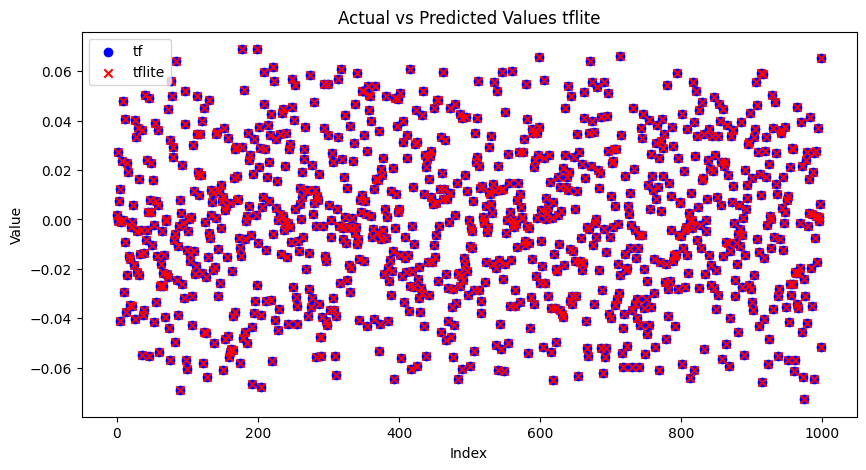

In [149]:
assert len(predtflite) == len(pred_fv), "The length of actual values and predicted values must be the same."
x = list(range(len(predtflite)))
plt.figure(figsize=(10, 5))

plt.scatter(x,pred_fv , label='tf', color='b', marker='o')

plt.scatter(x,predtflite, label='tflite', color='r', marker='x')

plt.title('Actual vs Predicted Values tflite')
plt.xlabel('Index')
plt.ylabel('Value')

plt.legend()

plt.show()